In [1]:
# Hace una regresión lineal con
# intervalos de confianza.

import numpy as np
import pandas as pd

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

In [2]:
path = "../datos/"
fname = "A.1_Wilks.csv"
cols = ["Date", "Ithaca - Min Temp",
    "Canandaigua - Min Temp"]

# Se cargan los datos de la tabla 1 de Wilks.
df = pd.read_csv(path + fname, 
    usecols = cols, index_col = "Date")

x = df[cols[1]]
y = df[cols[2]]

In [7]:
# Regresión lineal.
lin_reg = stats.linregress(x, y)

# Y gorro.
y_reg = ( lin_reg.intercept +
    lin_reg.slope * x )

# Residuales.
res = y - y_reg

# ANOVA
n = df.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
alpha = 5 / 100
F_crit = stats.f.ppf( 1 - alpha, 1,
    y.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    y.shape[0] - 2 )
t_crit = stats.t.ppf( 1 - alpha/2,
    y.shape[0] - 2 )
t_sb = ( t_crit * Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (y.shape[0] - 2) ) )
durbin = durbin_watson(res)

print(f"n:            {n}")
print(f"a:             {lin_reg.slope:.4f}")
print(f"b:            {lin_reg.intercept:.4f}")
print(f"X_mean:       {x.mean():.4f}")
print(f"Y_mean:       {y.mean():.4f}")
print(f"SST:        {SST:.4f}")
print(f"SSR:        {SSR:.4f}")
print(f"SSE:         {SSE:.4f}")
print(f"RMSE:          {Se:.4f}")
print(f"R:             {R:.4f}")
print(f"F:           {F:.4f}")
print(f"F_crit:        {F_crit:.4f}")
print(f"p:             {p:.4f}")
print(f"t_crit:        {t_crit:.4f}")
print(f"t_sb:          {t_sb:.4f}")
print(f"Durbin-Watson: {durbin:.4f}")

n:            31
a:             0.5974
b:            12.4595
X_mean:       13.0000
Y_mean:       20.2258
SST:        2327.4194
SSR:        1985.7973
SSE:         341.6221
RMSE:          3.4322
R:             0.8532
F:           168.5726
F_crit:        4.1830
p:             1.0000
t_crit:        2.0452
t_sb:          0.0175
Durbin-Watson: 1.5554


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001BFF6B03888> has a label of '_' which cannot be automatically added to the legend.
  if sys.path[0] == '':
C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001BFF7052588> has a label of '_' which cannot be automatically added to the legend.


Filliben Q-Q plot test: 0.9823


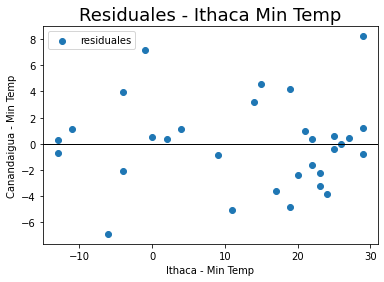

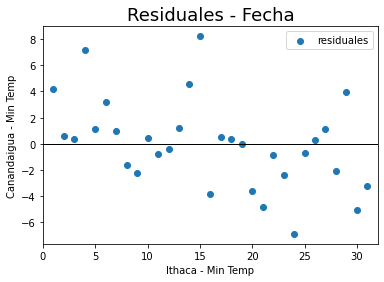

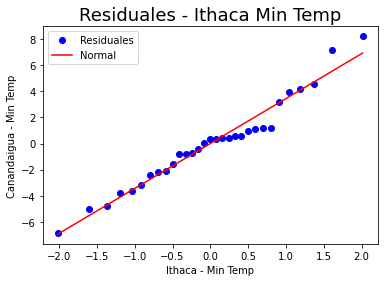

In [4]:
# Residuales - x
fig, ax = plt.subplots()
ax.scatter(x, res)
x_lin = x.append(pd.Series([-15,31]))
ax.plot(x_lin, np.zeros_like(x_lin), color = "black",
    linewidth = 1)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.legend(["_", "residuales"])
ax.set_xlim(-15, 31)

# Residuales - fecha
fig, ax = plt.subplots()
ax.scatter(df.index, res)
x_lin = x.append(pd.Series([0,32]))
ax.plot(x_lin, np.zeros_like(x_lin), color = "black",
    linewidth = 1)

ax.set_title("Residuales - Fecha",
    fontsize = 18)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.legend(["_", "residuales"])
ax.set_xlim(0, 32)

# Q-Q plot
fig, ax = plt.subplots()
qqplot = stats.probplot(res, plot = ax)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.legend(["Residuales", "Normal"])

print(f"Filliben Q-Q plot test: {qqplot[1][2]:.4f}")

(-15.0, 31.0)

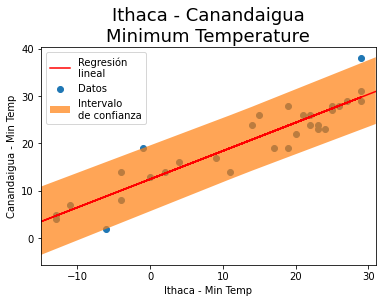

In [5]:
x_lin = x.append(pd.Series([-15, 31]))
y_reg_lin = ( lin_reg.intercept +
    lin_reg.slope * x_lin )

# Intervalos de confianza
y_t1 = ( ( lin_reg.slope - t_sb )
    * ( x_lin - x_lin.mean() ) + y.mean() )
y_t2 = ( ( lin_reg.slope + t_sb )
    * ( x_lin - x_lin.mean() ) + y.mean() )

y_t1_plus = y_t1 + 1.96 * Se
y_t2_plus = y_t2 + 1.96 * Se
y_t1_minus = y_t1 - 1.96 * Se
y_t2_minus = y_t2 - 1.96 * Se

y_t_plus = ( np.maximum(y_t1_plus, y_t2_plus).sort_values() )
y_t_minus = ( np.minimum(y_t1_minus, y_t2_minus).sort_values() )

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_lin, y_reg_lin, color = "r")
ax.fill_between(x_lin.sort_values(),
    y_t_minus, y_t_plus, alpha = 0.7)

ax.set_title("Ithaca - Canandaigua\n"
    "Minimum Temperature",
    fontsize = 18)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.legend(["Regresión\nlineal",
    "Datos", "Intervalo\nde confianza"])
ax.set_xlim(-15, 31)